<a href="https://colab.research.google.com/github/Darshini-A/Data-Storage-Management/blob/main/LinearDiscriminant%201%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [40]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [41]:
df = pd.DataFrame(digits.data, columns = digits.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [42]:
print("Target is : ", digits.target[0])
digits.data[0]

Target is :  0


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [43]:
digits.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Target is :  0


<Figure size 640x480 with 0 Axes>

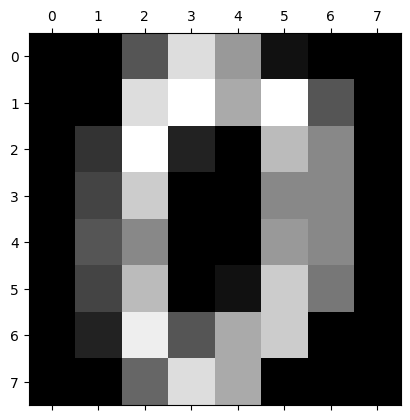

In [44]:
print("Target is : ", digits.target[0])
plt.gray()
plt.matshow(digits.data[0].reshape(8,8))
plt.show()

In [45]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=23)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lda = LinearDiscriminantAnalysis(n_components=9)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
y_pred = rf.predict(X_test)
y_pred

array([4, 6, 5, 8, 5, 4, 0, 5, 4, 5, 6, 5, 8, 7, 8, 3, 1, 9, 8, 8, 3, 4,
       2, 9, 4, 7, 8, 1, 9, 2, 9, 7, 8, 1, 5, 5, 3, 9, 4, 5, 4, 9, 0, 4,
       1, 3, 7, 6, 5, 5, 2, 7, 3, 3, 8, 6, 1, 3, 1, 9, 5, 5, 9, 1, 6, 5,
       6, 8, 1, 5, 4, 2, 5, 8, 9, 7, 5, 4, 6, 0, 8, 0, 5, 4, 6, 8, 2, 2,
       1, 4, 2, 5, 1, 5, 1, 1, 3, 8, 5, 9, 2, 9, 8, 8, 4, 4, 6, 1, 4, 1,
       8, 0, 3, 2, 4, 6, 3, 9, 6, 2, 9, 1, 3, 4, 1, 4, 0, 7, 4, 4, 2, 0,
       1, 1, 4, 8, 4, 0, 5, 0, 7, 6, 3, 5, 9, 4, 3, 4, 5, 7, 3, 7, 8, 3,
       3, 1, 5, 7, 7, 6, 2, 0, 0, 4, 1, 2, 1, 7, 5, 1, 2, 2, 2, 6, 5, 9,
       5, 9, 3, 2, 2, 9, 0, 7, 9, 2, 2, 8, 3, 1, 6, 7, 0, 1, 4, 7, 1, 1,
       0, 6, 1, 5, 4, 5, 3, 2, 6, 6, 5, 4, 8, 1, 9, 6, 1, 8, 0, 8, 8, 5,
       8, 3, 3, 8, 8, 4, 0, 6, 9, 6, 3, 8, 5, 9, 0, 6, 9, 7, 6, 6, 2, 0,
       9, 9, 5, 1, 1, 3, 9, 9, 9, 5, 7, 3, 5, 1, 3, 3, 9, 4, 1, 5, 9, 5,
       8, 9, 8, 7, 2, 5, 6, 0, 8, 9, 8, 6, 5, 0, 3, 9, 7, 0, 2, 0, 0, 4,
       7, 2, 1, 5, 2, 9, 2, 8, 2, 9, 0, 4, 2, 0, 9,

In [47]:
acc = accuracy_score(y_test, y_pred)
acc

0.9527777777777777

In [48]:
fig = px.scatter_3d(df, x=X_train[:,8], y=y_train, z=X_train[:,7],
 labels={
 "x": "LD1",
 "y": "LD2",
 "z": "LD3"
 },
 opacity=1, color = y_train)

fig.update_layout(scene=dict(xaxis_backgroundcolor="white",
 yaxis_backgroundcolor="white",
 zaxis_backgroundcolor="white"))

fig.update_layout(scene=dict(xaxis_showgrid=True, xaxis_gridwidth=1,
xaxis_gridcolor='lightgrey',
 xaxis_zeroline=True, xaxis_zerolinewidth=1,
xaxis_zerolinecolor='lightgrey',
 xaxis_showline=True, xaxis_linewidth=1, xaxis_linecolor='black',
 yaxis_showgrid=True, yaxis_gridwidth=1, yaxis_gridcolor='lightgrey',
 yaxis_zeroline=True, yaxis_zerolinewidth=1,
yaxis_zerolinecolor='lightgrey',
 yaxis_showline=True, yaxis_linewidth=1, yaxis_linecolor='black',
 zaxis_showgrid=True, zaxis_gridwidth=1, zaxis_gridcolor='lightgrey',
 zaxis_zeroline=True, zaxis_zerolinewidth=1,
zaxis_zerolinecolor='lightgrey',

 zaxis_showline=True, zaxis_linewidth=1, zaxis_linecolor='black'))

fig.update_layout(title_text="3D Linear Discriminant scatter plot")

fig.update_traces(marker=dict(size=3))
fig.show()